In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)


## Классификация с использованием решающего дерева

Для классификации мы будем использовать датасет `load_iris()` из библиотеки `sklearn.datasets`. Посмотрим подробнее:

In [4]:
data = datasets.load_iris()
print(data['DESCR'])
data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X = data["data"]
y = data["target"]


Посмотрим, сколько всего у нас классов в датасете.

In [6]:
np.unique(y)

array([0, 1, 2])

Проверим, сколько элементов каждого класса есть в датасете.

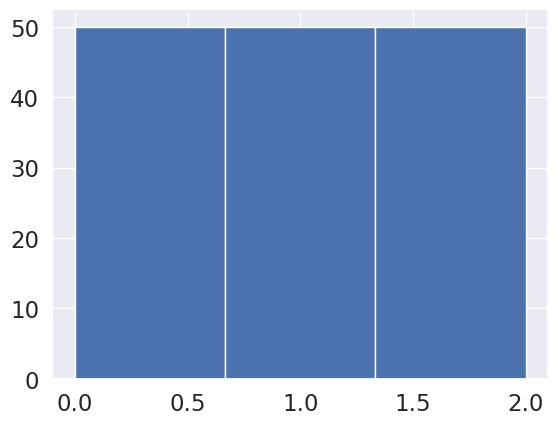

In [7]:
plt.hist(y, bins=len(np.unique(y)));

Получается, что мы имеем одинаковое кол-во элементов каждого класса. Предположите, чем будет плоха сильная дисбаллансировка классов.

**Ответ:** дерево будет хорошо приближать одни признаки и плохо другие (из-за недостаточной тренировочной базы, например)

Сопоставим каждому классу цвет.

In [8]:
colors = ListedColormap(['#FF3300', '#0099CC', '#00CC66'])


Посмотрим на данные.

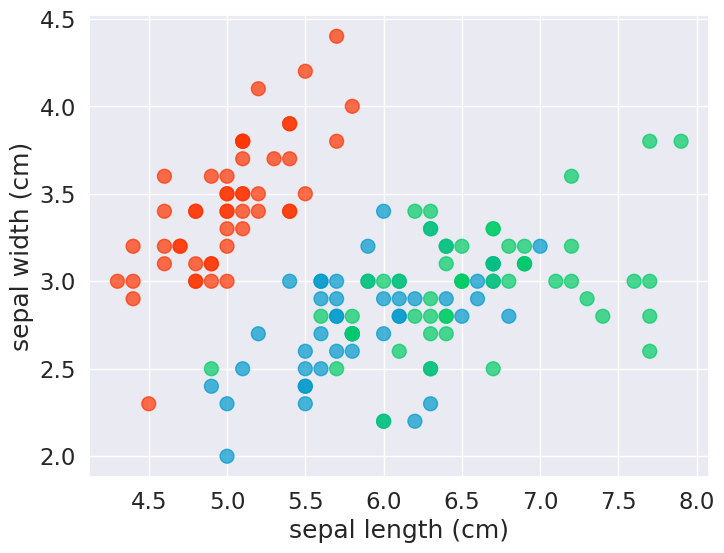

In [9]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 0]
grid_x2 = X[:, 1]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1]);

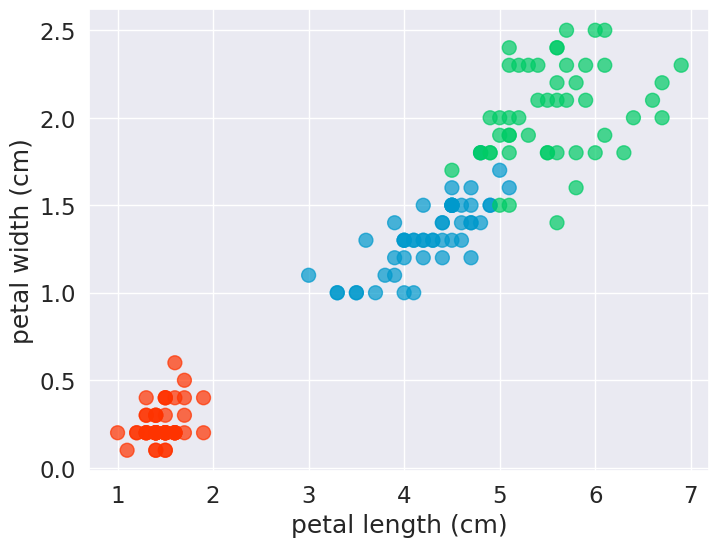

In [10]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 2]
grid_x2 = X[:, 3]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][2])
plt.ylabel(data['feature_names'][3]);

Какой вывод можно сделать из полученных графиков?

**Ответ:** sepal width и sepal length разделены неплохо, а petal width и petal length вообще прекрасно

Разделим выборку на обучающую и тестовую

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=207
)

Инициализируем и обучим решающее дерево для классификации.

In [13]:
clf = DecisionTreeClassifier(random_state=207)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=207)

Выведите параметры дерева с помощью функции `get_params()`.


In [14]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 207,
 'splitter': 'best'}

Сделаем предсказание и оценим качество модели.

In [15]:
predictions = clf.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 0.9333333333333333


Визуализируйте дерево с помощью `sklearn.tree.plot_tree()`.

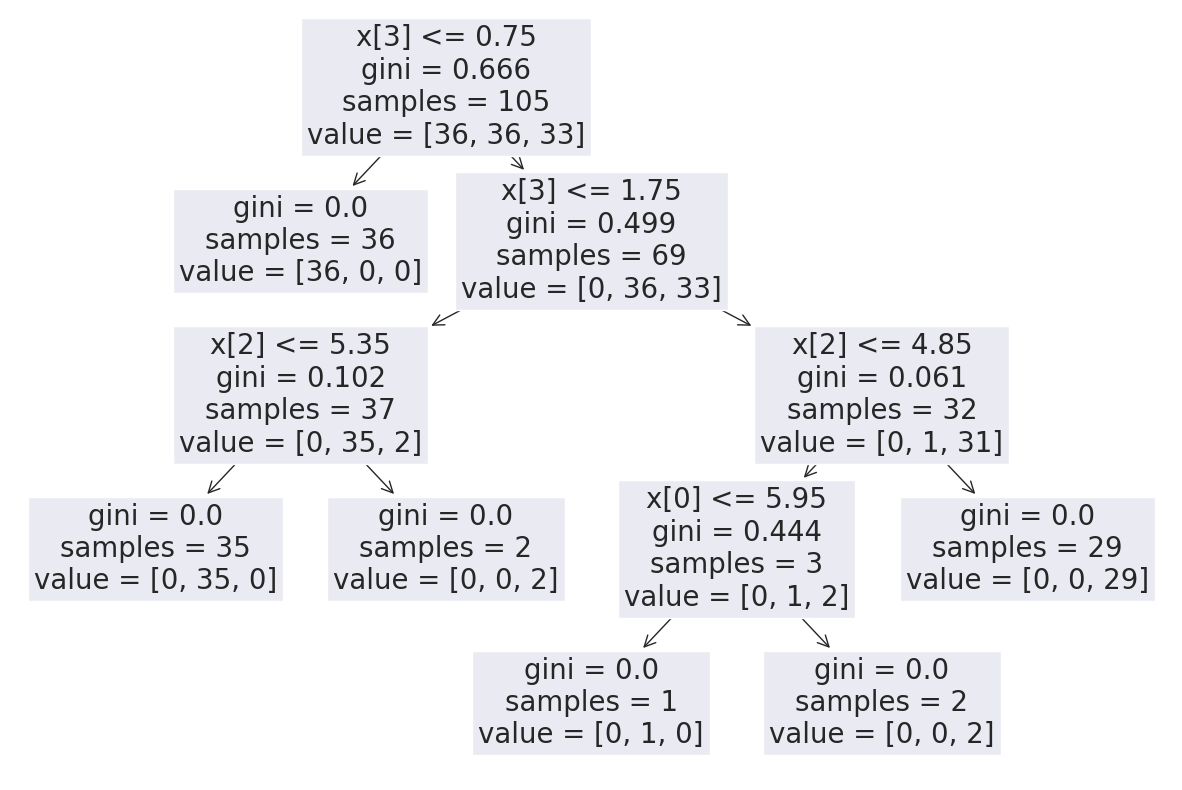

In [16]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

Поменяйте параметр max_depth, заново обучите классификатор и визуализируйте получившееся дерево/деревья. Сделайте вывод - за что отвечает параметр?

test accuracy: 0.9333333333333333


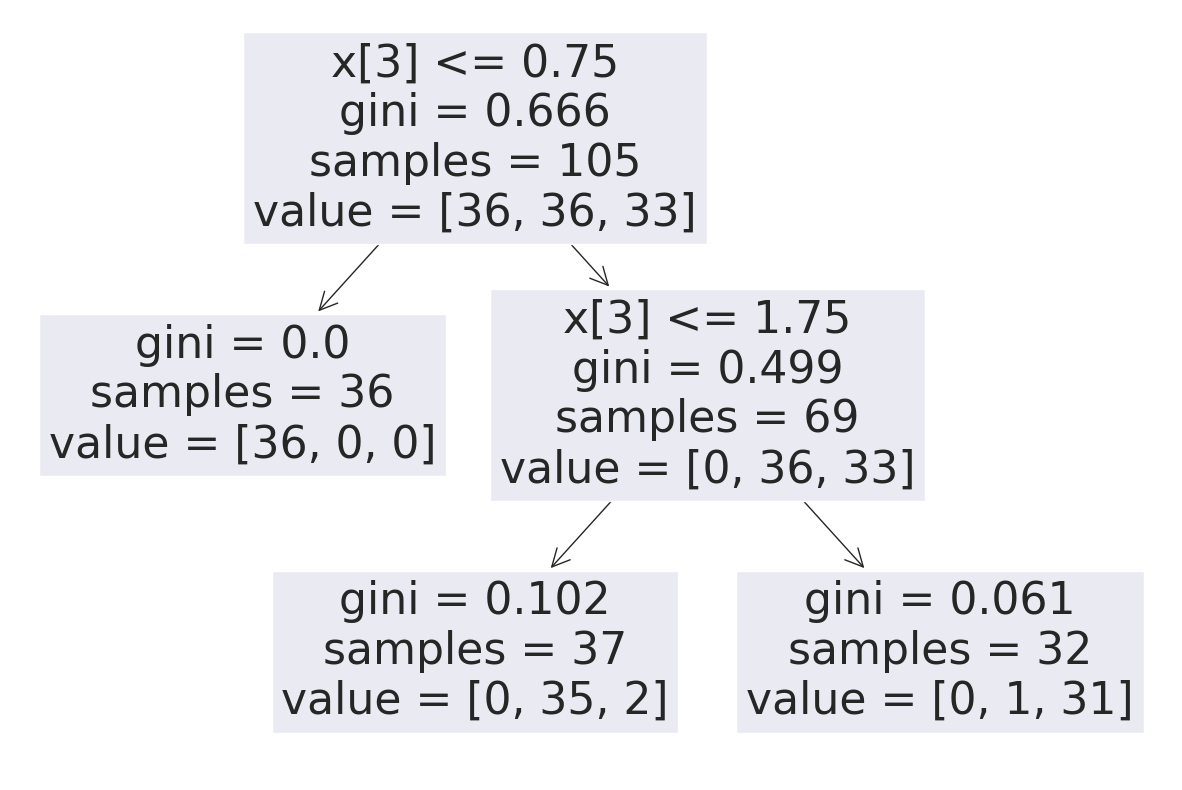

In [23]:
clf = DecisionTreeClassifier(max_depth=2, random_state=207)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('test accuracy:', accuracy_score(predictions, y_test))

plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

**Ответ:** параметр отвечает за максимальную глубину дерева (расстояние от родителя до самого дальнего потомка)

Сделайте то же для параметры min_samples_leaf. За что он отвечает?


test accuracy: 0.9333333333333333


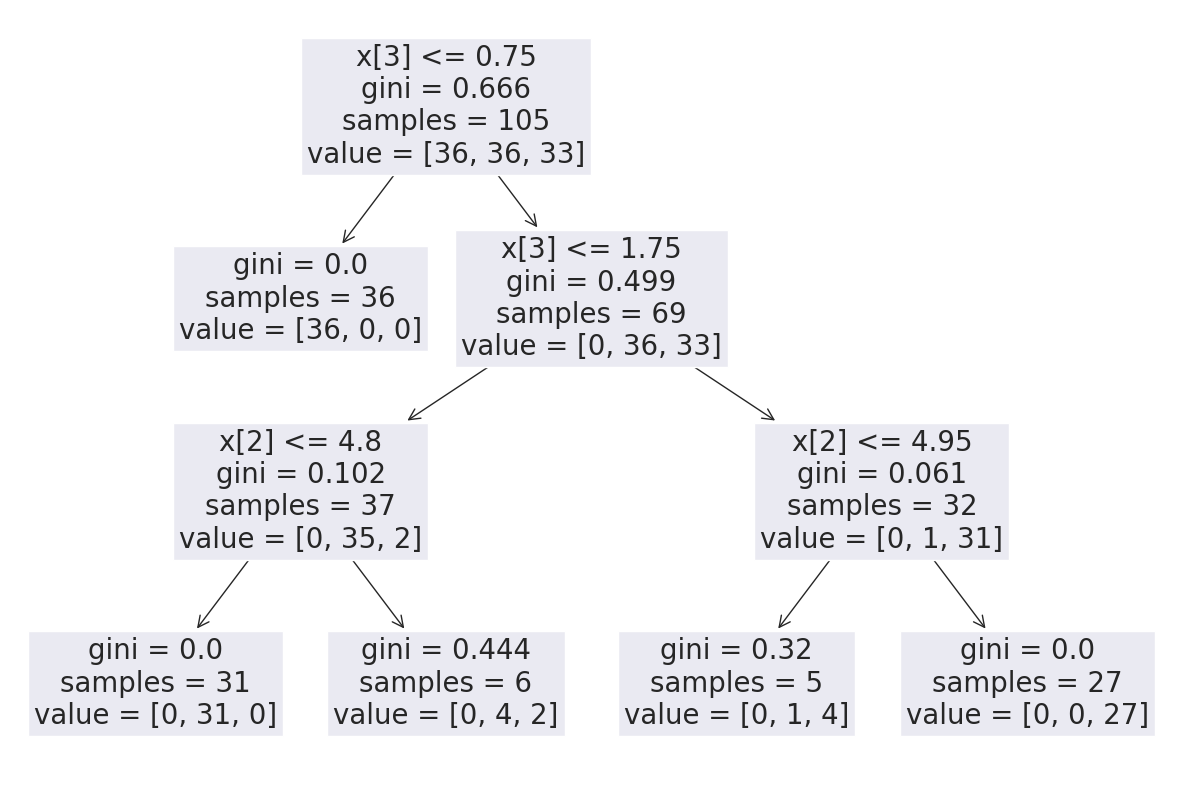

In [31]:
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=207)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('test accuracy:', accuracy_score(predictions, y_test))

plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

**Ответ:** min_sample_leaf - это минимальное число sample, которое может быть на 1 листе